### 📚 Importación de librerías 

In [44]:
!pip install xlrd
!pip install psycopg2
!pip install install mysql-connector-python
!pip install pydotplus
!pip install graphviz
!pip install mglearn
!pip install seaborn
!pip install keras
!pip install tensorflow
# from sklearn.metrics import accuracy_score, classification_report 
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier 
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC 
# from sklearn import metrics
# from sklearn import tree
# from pickle import dump

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib.colors import ListedColormap
from Tools.scripts.dutree import display
from sklearn.tree import export_graphviz
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from IPython.display import display
import matplotlib.pyplot as plt
import mysql.connector as sql
import psycopg2 as ps
import seaborn as sns
import pandas as pd
import numpy  as np
import pydotplus
import graphviz
import mglearn
import pickle
import xlrd

# Análisis del Dataset

In [45]:
# Se realiza la conexión a la base de datos
db_connection = sql.connect(host='localhost', database='proyecto_final_machine_learning', user='root', password='')
db_cursor = db_connection.cursor(buffered=True)

In [46]:
# Se realiza una query a la base de datos
db_cursor.execute("SELECT nombre_comun, pb, pap, dap, papdel, papgrueso, altura_fuste, altura_arbol, diferencia," 
                  "diametro_copa, tallos " 
                  "FROM censo " 
                  "where upper(edad) like 'MADURO' and "
                  "(nombre_comun like 'Palma areca'"
                  "or nombre_comun like 'Palma real de Cuba'" 
                  "or nombre_comun like 'Limon swinglea, Swinglea')")

# Los resultados se almacenan en table_rows
table_rows = db_cursor.fetchall()

# Se organiza un dataframe de pandas para el almacenamiento de los datos resultado de la query
df = pd.DataFrame(table_rows)

print(df.head())

                         0     1    2     3     4     5    6     7    8   \
0  Limon swinglea, Swinglea  1.45  0.0  0.18  0.45  0.71  5.0   9.0  4.0   
1               Palma areca  1.00  0.0  0.06  0.18  0.20  3.5   6.6  3.1   
2  Limon swinglea, Swinglea  1.42  0.0  0.19  0.54  0.68  5.5  10.5  5.0   
3        Palma real de Cuba  2.67  1.3  0.41  0.00  0.00  7.0  10.0  3.0   
4        Palma real de Cuba  2.90  2.1  0.67  0.00  0.00  7.0  10.0  3.0   

      9   10  
0   8.00   3  
1   5.00   4  
2   7.00   2  
3   5.12   1  
4  10.00   1  


In [47]:
# Se renombran las columnas del dataset ya que los nombres son columnas
df.columns = ['nombre_comun', 'pb', 'pap', 'dap', 'papdel', 'papgrueso', 'altura_fuste', 'altura_arbol', 'diferencia', 
              'diametro_copa', 'tallos']

print(df.head())

               nombre_comun    pb  pap   dap  papdel  papgrueso  altura_fuste  \
0  Limon swinglea, Swinglea  1.45  0.0  0.18    0.45       0.71           5.0   
1               Palma areca  1.00  0.0  0.06    0.18       0.20           3.5   
2  Limon swinglea, Swinglea  1.42  0.0  0.19    0.54       0.68           5.5   
3        Palma real de Cuba  2.67  1.3  0.41    0.00       0.00           7.0   
4        Palma real de Cuba  2.90  2.1  0.67    0.00       0.00           7.0   

   altura_arbol  diferencia  diametro_copa  tallos  
0           9.0         4.0           8.00       3  
1           6.6         3.1           5.00       4  
2          10.5         5.0           7.00       2  
3          10.0         3.0           5.12       1  
4          10.0         3.0          10.00       1  


In [48]:
# Se analiza la frecuencia de cada especie en el dataset
print(df['nombre_comun'].value_counts() )

Limon swinglea, Swinglea    1196
Palma areca                  530
Palma real de Cuba           503
Name: nombre_comun, dtype: int64


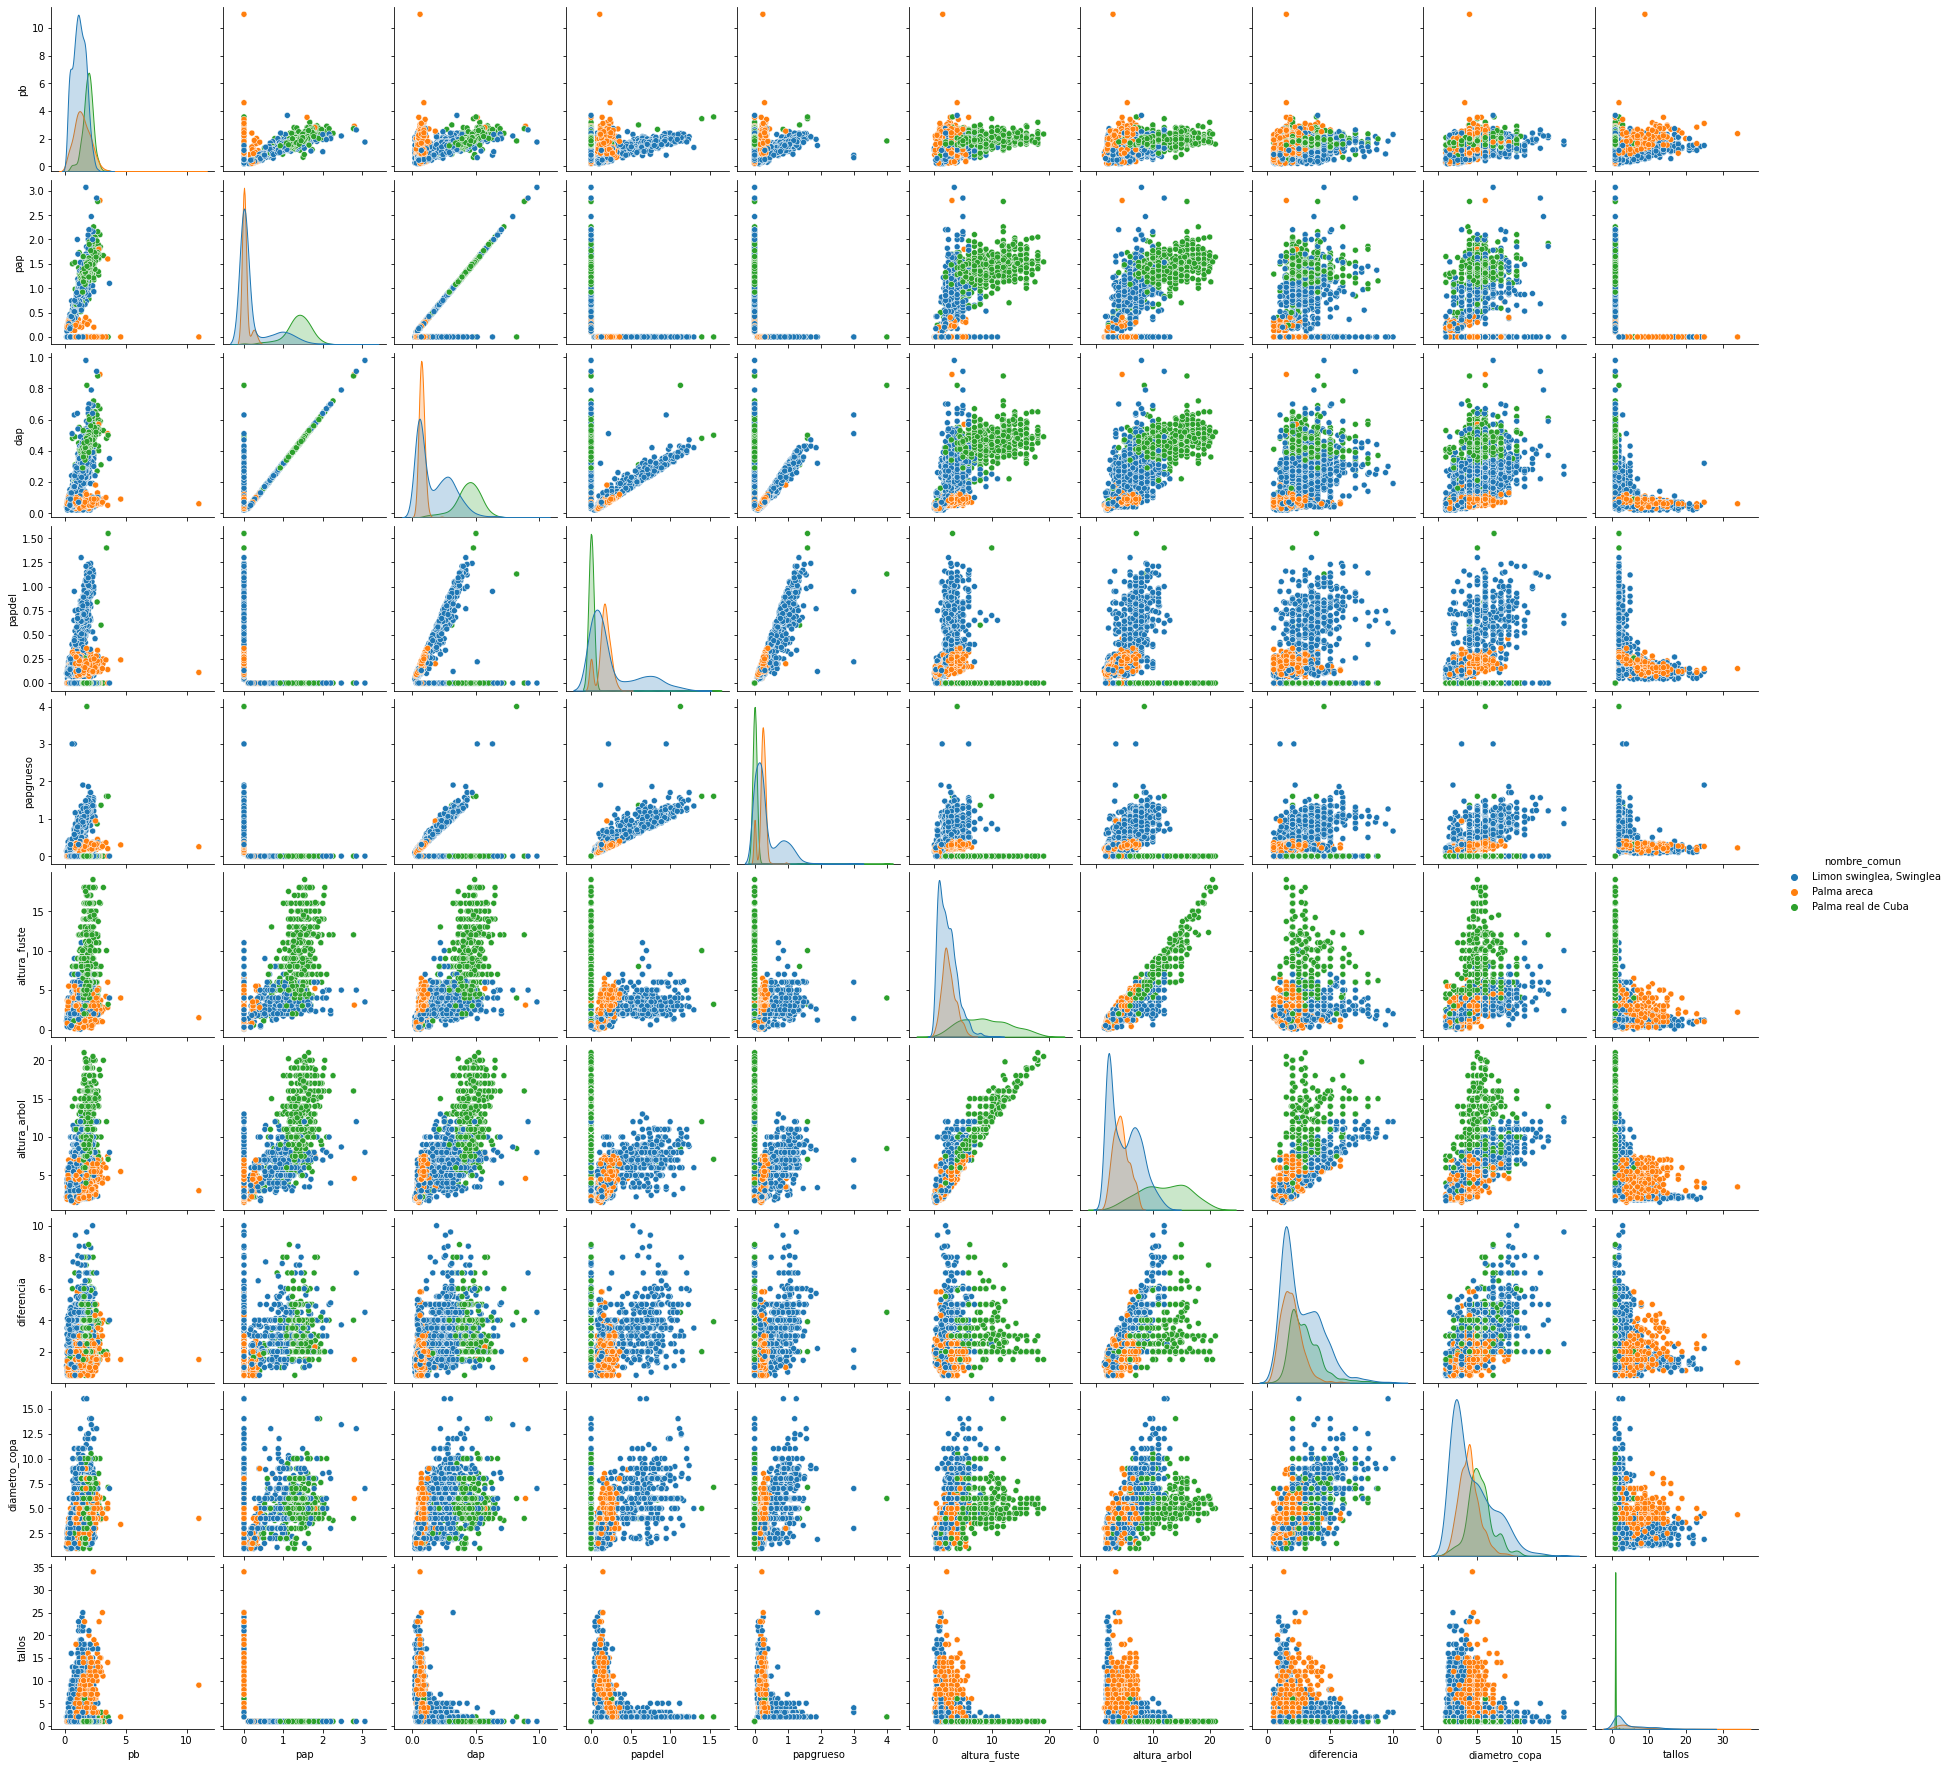

In [10]:
sns_plot = sns.pairplot(df, hue='nombre_comun')
plt.show()
sns_plot.savefig("resources\sns_pairplot.png")

In [51]:
# Se hace una tranformación de los target (Nombre de las especies) a valores númericos para que puedan ser procesados
df['nombre_comun'].replace(to_replace=['Palma real de Cuba', 'Limon swinglea, Swinglea', 'Palma areca'], value=[0, 1, 2], inplace=True)

# Se separan los features del dataset
x = df[['pb', 'pap', 'dap', 'papdel', 'papgrueso', 'altura_fuste','altura_arbol', 'diferencia', 'diametro_copa', 
        'tallos']]  

# Se extraen los target del dataset
y = df['nombre_comun']

print(np.unique(y))

# Se exportan los datos depurados
df.to_csv('resources/datos_depurados.csv')

# Se separa el train y test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(y_train.value_counts())

[0 1 2]
(1560, 10)
(669, 10)
(1560, 3)
(669, 3)


In [65]:
# model.add(layers.Dense(512, activation='relu', input_shape=(10,)))
model = Sequential()
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size = 40)

Epoch 1/20
39/39 [==============================] - 2s 3ms/step - loss: 1.6777 - accuracy: 0.4391
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 1.3382 - accuracy: 0.5064
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 1.1048 - accuracy: 0.5929
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.9497 - accuracy: 0.6308
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.6449
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.7418 - accuracy: 0.6551
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6686
Epoch 8/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.6981
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7186
Epoch 10/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7282
Epoch 11/20
39/39 [

In [63]:
def get_config(self):
    cfg = super().get_config()
    return cfg 

In [64]:
model.save('model.h5')

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.